<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Does participating in standardized tests such as SAT improve education attainment in America? 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

However, despite this recent trend to opt-out of standardized tests for college admissions, more states are opting-in to mandate either SAT or ACT to Juniors or Seniors in high school, with the help of test agencies offering free testing days and study materials. ([*source*](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about)).
By doing so, the state officials are not only eliminating additional assessment tests for students to stress over by replacing them with SAT or ACT, but also hoping to encourage those who are not planning on attending college to reconsider. 
In this analysis, I want to investigate whether the increase in SAT participation leads to higher education attainment for states.     

* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`table-1.csv`](./data/table-1.csv): List of US States and Territories by Education Attainment ([*table source*](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment#cite_note-datasource-1)) ([*original source - Bureau, U.S. Census. "2013-2017 American Community Survey 5-Year Estimates"*](https://archive.vn/20190517072954/https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_S1501))



### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [235]:
# Code: 


lst = [2,3,4,5,6,7]

def mean(lst):
    total = 0
    for num in lst:
        total += int(num)
    return total/len(lst)

mean(lst)

4.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [236]:
# Code:
lst = [2,3,4,5,6,7]
def standarddev(lst):
    devlst = []
    for num in lst:
        dev = (num - mean(lst))**2
        devlst.append(dev)
    stdev = (sum(devlst)/len(lst))**0.5
    return stdev
standarddev(lst)

1.707825127659933

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [237]:
# Code:
def p_to_d(percent):     
    keep = '0123456789.'
    new = ''
    for p in percent:
        if p in keep:
            new = new + p
    try:
        return float(new)/100
    except (ValueError, NameError, AttributeError):
        return None

p_to_d('30.5%')


0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [238]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Import and Cleaning


Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.


In [256]:
# Code:
SAT2019 = pd.read_csv('data/sat_2019.csv')
SAT2018 = pd.read_csv('data/sat_2018.csv')
SAT2017 = pd.read_csv('data/sat_2017.csv')

CollegebyState = pd.read_csv('data/table-1.csv')



In [240]:
SAT2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [241]:
SAT2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [242]:
SAT2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [257]:
CollegebyState.head()

,"State, federal district, or territory",Percent High school graduate or higher,Percent Bachelor's degree or higher,Percent Advanced degree
0,Montana,93.0%,30.7%,10.1%
1,New Hampshire,92.8%,36.0%,13.8%
2,Minnesota,92.8%,34.8%,11.8%
3,Wyoming,92.8%,26.7%,9.3%
4,Alaska,92.4%,29.0%,10.4%


In [258]:
SAT2019['Participation Rate'] = SAT2019['Participation Rate'].apply(lambda x: p_to_d(x))
SAT2018['Participation'] = SAT2018['Participation'].apply(lambda x: p_to_d(x))
SAT2017['Participation'] = SAT2017['Participation'].apply(lambda x: p_to_d(x))
CollegebyState['Percent High school graduate or higher'] = CollegebyState['Percent High school graduate or higher'].apply(lambda x: p_to_d(x))
CollegebyState['Percent Bachelor\'s degree or higher'] = CollegebyState['Percent Bachelor\'s degree or higher'].apply(lambda x: p_to_d(x))
CollegebyState['Percent Advanced degree'] = CollegebyState['Percent Advanced degree'].apply(lambda x: p_to_d(x))


In [259]:
def summary(df): # a simple function to show summary data 
    return print('-----Info/DataTypes-----'), df.info(), print('-----Missing Values/Describe-----'), df.isnull().sum(), df.describe()

In [260]:
summary(SAT2019)

-----Info/DataTypes-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               53 non-null     object 
 1   Participation Rate  51 non-null     float64
 2   EBRW                53 non-null     int64  
 3   Math                53 non-null     int64  
 4   Total               53 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB
-----Missing Values/Describe-----


(None,
 None,
 None,
 State                 0
 Participation Rate    2
 EBRW                  0
 Math                  0
 Total                 0
 dtype: int64,
        Participation Rate        EBRW        Math        Total
 count           51.000000   53.000000   53.000000    53.000000
 mean             0.490588  558.000000  548.471698  1106.528302
 std              0.387476   47.554422   53.785044   100.994784
 min              0.020000  483.000000  445.000000   935.000000
 25%              0.055000  518.000000  506.000000  1024.000000
 50%              0.540000  550.000000  545.000000  1097.000000
 75%              0.820000  610.000000  596.000000  1200.000000
 max              1.000000  636.000000  648.000000  1284.000000)

In [261]:
summary(SAT2018)

-----Info/DataTypes-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
-----Missing Values/Describe-----


(None,
 None,
 None,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
        Participation  Evidence-Based Reading and Writing        Math  \
 count      51.000000                           51.000000   51.000000   
 mean        0.457451                          563.686275  556.235294   
 std         0.373143                           47.502627   47.772623   
 min         0.020000                          480.000000  480.000000   
 25%         0.045000                          534.500000  522.500000   
 50%         0.520000                          552.000000  544.000000   
 75%         0.775000                          610.500000  593.500000   
 max         1.000000                          643.000000  655.000000   
 
              Total  
 count    51.000000  
 mean   1120.019608  
 std      94.155083  
 min     977

In [262]:
summary(SAT2017)

-----Info/DataTypes-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
-----Missing Values/Describe-----


(None,
 None,
 None,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
        Participation  Evidence-Based Reading and Writing        Math  \
 count      51.000000                           51.000000   51.000000   
 mean        0.398039                          569.117647  547.627451   
 std         0.352766                           45.666901   84.909119   
 min         0.020000                          482.000000   52.000000   
 25%         0.040000                          533.500000  522.000000   
 50%         0.380000                          559.000000  548.000000   
 75%         0.660000                          613.000000  599.000000   
 max         1.000000                          644.000000  651.000000   
 
              Total  
 count    51.000000  
 mean   1126.098039  
 std      92.494812  
 min     950

In [263]:
summary(CollegebyState)

-----Info/DataTypes-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State, federal district, or territory   57 non-null     object 
 1   Percent High school graduate or higher  57 non-null     float64
 2   Percent Bachelor's degree or higher     57 non-null     float64
 3   Percent Advanced degree                 57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB
-----Missing Values/Describe-----


(None,
 None,
 None,
 State, federal district, or territory     0
 Percent High school graduate or higher    0
 Percent Bachelor's degree or higher       0
 Percent Advanced degree                   0
 dtype: int64,
        Percent High school graduate or higher  \
 count                               57.000000   
 mean                                 0.878667   
 std                                  0.045128   
 min                                  0.689000   
 25%                                  0.859000   
 50%                                  0.892000   
 75%                                  0.909000   
 max                                  0.930000   
 
        Percent Bachelor's degree or higher  Percent Advanced degree  
 count                            57.000000                57.000000  
 mean                              0.296105                 0.111333  
 std                               0.069283                 0.042420  
 min                               0.099000     


7. Rename Columns.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.


In [264]:
SAT2019.columns = SAT2019.columns.str.lower() # capitalized letters to lower case
SAT2018.columns = SAT2018.columns.str.lower()
SAT2017.columns = SAT2017.columns.str.lower()
CollegebyState.columns = CollegebyState.columns.str.lower()

In [265]:
SAT2019.columns = SAT2019.columns.str.replace(' ', '_') # spaces to underscore
SAT2018.columns = SAT2018.columns.str.replace(' ', '_')
SAT2017.columns = SAT2017.columns.str.replace(' ', '_')
CollegebyState.columns = CollegebyState.columns.str.replace(' ', '_')

In [266]:
CollegebyState.head()

,"state,_federal_district,_or_territory",percent_high_school_graduate_or_higher,percent_bachelor's_degree_or_higher,percent_advanced_degree
0,Montana,0.930,0.307,0.101
1,New Hampshire,0.928,0.360,0.138
2,Minnesota,0.928,0.348,0.118
3,Wyoming,0.928,0.267,0.093
4,Alaska,0.924,0.290,0.104


In [267]:
SAT2019.rename(columns={
          'participation_rate': '2019_participation_rate',
          'ebrw': '2019_ebrw',
          'math': '2019_math',
          'total': '2019_total'
}, inplace=True) 
SAT2018.rename(columns={
          'participation': '2018_participation_rate',
          'evidence-based_reading_and_writing': '2018_ebrw',
          'math': '2018_math',
          'total': '2018_total'
}, inplace=True) 
SAT2017.rename(columns={
          'participation': '2017_participation_rate',
          'evidence-based_reading_and_writing': '2017_ebrw',
          'math': '2017_math',
          'total': '2017_total'
}, inplace=True) 
CollegebyState.rename(columns={
          'state,_federal_district,_or_territory': 'state',
          'percent_high_school_graduate_or_higher': '2013-2017_hs_graduate',
          'percent_bachelor\'s_degree_or_higher': '2013-2017_bachelors_graduate',
          'percent_advanced_degree': '2013-2017_advanced_degree_graduate'
}, inplace=True) 

In [268]:
SAT_2017_2018 = pd.merge(SAT2017, SAT2018, how='left')
SAT_2017_2019 = pd.merge(SAT_2017_2018, SAT2019, how='left')
SAT_Participation_vs_HigherEdu = pd.merge(SAT_2017_2019, CollegebyState, how='left')





11. Save your cleaned and merged dataframes as csv files.

In [269]:
SAT_Participation_vs_HigherEdu.head()

,state,2017_participation_rate,2017_ebrw,2017_math,2017_total,2018_participation_rate,2018_ebrw,2018_math,2018_total,2019_participation_rate,2019_ebrw,2019_math,2019_total,2013-2017_hs_graduate,2013-2017_bachelors_graduate,2013-2017_advanced_degree_graduate
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,0.853,0.245,0.091
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,0.924,0.290,0.104
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,0.865,0.284,0.107
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,0.856,0.220,0.079
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,0.825,0.326,0.122


In [270]:
SAT_Participation_vs_HigherEdu.loc[SAT_Participation_vs_HigherEdu['2019_participation_rate'].notnull(), :].to_csv('SAT-HigherEd.csv', index=False)


In [271]:
sat_vs_highered = pd.read_csv('SAT-HigherEd.csv')

In [272]:
sat_vs_highered.head(30)

,state,2017_participation_rate,2017_ebrw,2017_math,2017_total,2018_participation_rate,2018_ebrw,2018_math,2018_total,2019_participation_rate,2019_ebrw,2019_math,2019_total,2013-2017_hs_graduate,2013-2017_bachelors_graduate,2013-2017_advanced_degree_graduate
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,0.853,0.245,0.091
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,0.924,0.290,0.104
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,0.865,0.284,0.107
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,0.856,0.220,0.079
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,0.825,0.326,0.122
5,Colorado,0.11,606,595,1201,1.00,519,506,1025,1.00,518,506,1024,0.911,0.394,0.146
6,Connecticut,1.00,530,512,1041,1.00,535,519,1053,1.00,529,516,1046,0.902,0.384,0.170
7,Delaware,1.00,503,492,996,1.00,505,492,998,1.00,499,486,985,0.893,0.310,0.129
8,District of Columbia,1.00,482,468,950,0.92,497,480,977,0.94,495,480,975,0.903,0.566,0.328
9,Florida,0.83,520,497,1017,0.56,550,549,1099,1.00,516,483,999,0.876,0.285,0.103


### Data Dictionary



|Feature                           |Type   |Dataset     |Description                                                                                                                                    |
|----------------------------------|-------|------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
|state                             |object |SAT-HigherEd|State in the US and District of Columbia                                                                                                       |
|2017_participation_rate           |float64|SAT-HigherEd|The percent SAT participation rate among high school seniors in 2017 (units percent to decimals 0.38 means 38%)                                |
|2017_ebrw                         |Int64  |SAT-HigherEd|The average score of the Evidence-Based Reading and Writing section in 2017 (out of 800)                                                       |
|2017_math                         |Int64  |SAT-HigherEd|The average score of the Mathematics section in 2017 (out of 800)                                                                              |
|2017_total                        |Int64  |SAT-HigherEd|The average of the total SAT score in 2017 (out of 1600)                                                                                       |
|2018_participation_rate           |float64|SAT-HigherEd|The percent SAT participation rate among high school seniors in 2018 (units percent to decimals 0.38 means 38%)                                |
|2018_ebrw                         |Int64  |SAT-HigherEd|The average score of the Evidence-Based Reading and Writing section in 2018 (out of 800)                                                       |
|2018_math                         |Int64  |SAT-HigherEd|The average score of the Mathematics section in 20178(out of 800)                                                                              |
|2018_total                        |Int64  |SAT-HigherEd|The average of the total SAT score in 2018 (out of 1600)                                                                                       |
|2019_participation_rate           |float64|SAT-HigherEd|The percent SAT participation rate among high school seniors in 2019 (units percent to decimals 0.38 means 38%)                                |
|2019_ebrw                         |Int64  |SAT-HigherEd|The average score of the Evidence-Based Reading and Writing section in 2019 (out of 800)                                                       |
|2019_math                         |Int64  |SAT-HigherEd|The average score of the Mathematics section in 2019 (out of 800)                                                                              |
|2019_total                        |Int64  |SAT-HigherEd|The average of the total SAT score in 2019 (out of 1600)                                                                                       |
|2013-2017_hs_graduate             |float64|SAT-HigherEd|The percentage of the total population who are high school graduates (units percent to decimals 0.38 means 38%)                                |
|2013_2017_bachelors_graduate      |float64|SAT-HigherEd|The percentage of the total population with Bachelor’s degree or higher (units percent to decimals 0.38 means 38%)                             |
|2013-2017_advanced_degree_graduate|float64|SAT-HigherEd|The percentage of the total population with an advanced degree (units percent to decimals 0.38 means 38%)                                      |



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [273]:
#Code:
summary(sat_vs_highered)

-----Info/DataTypes-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               51 non-null     object 
 1   2017_participation_rate             51 non-null     float64
 2   2017_ebrw                           51 non-null     int64  
 3   2017_math                           51 non-null     int64  
 4   2017_total                          51 non-null     int64  
 5   2018_participation_rate             51 non-null     float64
 6   2018_ebrw                           51 non-null     int64  
 7   2018_math                           51 non-null     int64  
 8   2018_total                          51 non-null     int64  
 9   2019_participation_rate             51 non-null     float64
 10  2019_ebrw                           51 non-null     int64  
 11  2019_math             

(None,
 None,
 None,
 state                                 0
 2017_participation_rate               0
 2017_ebrw                             0
 2017_math                             0
 2017_total                            0
 2018_participation_rate               0
 2018_ebrw                             0
 2018_math                             0
 2018_total                            0
 2019_participation_rate               0
 2019_ebrw                             0
 2019_math                             0
 2019_total                            0
 2013-2017_hs_graduate                 0
 2013-2017_bachelors_graduate          0
 2013-2017_advanced_degree_graduate    0
 dtype: int64,
        2017_participation_rate   2017_ebrw   2017_math   2017_total  \
 count                51.000000   51.000000   51.000000    51.000000   
 mean                  0.398039  569.117647  547.627451  1126.098039   
 std                   0.352766   45.666901   84.909119    92.494812   
 min                

In [274]:
col_lst = sat_vs_highered.columns.tolist()
col_lst

['state',
 '2017_participation_rate',
 '2017_ebrw',
 '2017_math',
 '2017_total',
 '2018_participation_rate',
 '2018_ebrw',
 '2018_math',
 '2018_total',
 '2019_participation_rate',
 '2019_ebrw',
 '2019_math',
 '2019_total',
 '2013-2017_hs_graduate',
 '2013-2017_bachelors_graduate',
 '2013-2017_advanced_degree_graduate']

In [275]:
sd = {   '2017_participation_rate': standarddev(sat_vs_highered['2017_participation_rate']),
    '2017_ebrw' : standarddev(sat_vs_highered['2017_ebrw']),
    '2017_math': standarddev(sat_vs_highered['2017_math']),
    '2017_total': standarddev(sat_vs_highered['2017_total']),
    '2018_participation_rate': standarddev(sat_vs_highered['2017_participation_rate']),
    '2018_ebrw' : standarddev(sat_vs_highered['2018_ebrw']),
    '2018_math': standarddev(sat_vs_highered['2018_math']),
    '2018_total': standarddev(sat_vs_highered['2018_total']),
    '2019_participation_rate': standarddev(sat_vs_highered['2017_participation_rate']),
    '2019_ebrw' : standarddev(sat_vs_highered['2019_ebrw']),
    '2019_math': standarddev(sat_vs_highered['2019_math']),
    '2019_total': standarddev(sat_vs_highered['2019_total']),
    '2013-2017_hs_graduate': standarddev(sat_vs_highered['2013-2017_hs_graduate']),
    '2013-2017_bachelors_graduate': standarddev(sat_vs_highered['2013-2017_bachelors_graduate']),
    '2013-2017_advanced_degree_graduate': standarddev(sat_vs_highered['2013-2017_advanced_degree_graduate'])
}

sd

{'2017_participation_rate': 0.4734481723029228,
 '2017_ebrw': 45.21697020437866,
 '2017_math': 84.07255521608297,
 '2017_total': 91.58351056778743,
 '2018_participation_rate': 0.4734481723029228,
 '2018_ebrw': 47.03460978357609,
 '2018_math': 47.30194550378352,
 '2018_total': 93.22742384464433,
 '2019_participation_rate': 0.4734481723029228,
 '2019_ebrw': 45.792378682545134,
 '2019_math': 50.78521461840036,
 '2019_total': 96.24027185617864,
 '2013-2017_hs_graduate': 0.889402487242826,
 '2013-2017_bachelors_graduate': 0.31248231322497494,
 '2013-2017_advanced_degree_graduate': 0.12347509076415245}

In [276]:
topcollegedegree = sat_vs_highered.sort_values(by='2013-2017_bachelors_graduate', ascending=False)
top10states_collegedegree = topcollegedegree.iloc[:10, :]
top10states_collegedegree

,state,2017_participation_rate,2017_ebrw,2017_math,2017_total,2018_participation_rate,2018_ebrw,2018_math,2018_total,2019_participation_rate,2019_ebrw,2019_math,2019_total,2013-2017_hs_graduate,2013-2017_bachelors_graduate,2013-2017_advanced_degree_graduate
8,District of Columbia,1.00,482,468,950,0.92,497,480,977,0.94,495,480,975,0.903,0.566,0.328
21,Massachusetts,0.76,555,551,1107,0.80,562,563,1125,0.81,559,561,1120,0.903,0.421,0.187
5,Colorado,0.11,606,595,1201,1.00,519,506,1025,1.00,518,506,1024,0.911,0.394,0.146
20,Maryland,0.69,536,52,1060,0.76,545,535,1080,0.82,535,523,1058,0.898,0.390,0.180
6,Connecticut,1.00,530,512,1041,1.00,535,519,1053,1.00,529,516,1046,0.902,0.384,0.170
30,New Jersey,0.70,530,526,1056,0.82,547,547,1094,0.82,544,545,1090,0.892,0.381,0.147
46,Virginia,0.65,561,541,1102,0.68,567,550,1117,0.68,567,551,1119,0.890,0.376,0.161
45,Vermont,0.60,562,551,1114,0.64,565,554,1120,0.66,560,546,1106,0.923,0.368,0.150
29,New Hampshire,0.96,532,520,1052,0.96,535,528,1063,0.95,533,526,1059,0.928,0.360,0.138
32,New York,0.67,528,523,1052,0.79,534,534,1068,0.79,531,533,1064,0.861,0.353,0.154


The top 10 states with the highest percentage of people with Bachelor's degree or higher seem to have overall high participation rate of SATs. 

In [277]:
top10states_collegedegree['2017_participation_rate'] > 0.5 

8      True
21     True
5     False
20     True
6      True
30     True
46     True
45     True
29     True
32     True
Name: 2017_participation_rate, dtype: bool

I wanted to see whether these states  were above the 75th percentile of the SAT participation rate in either 2017, 2018, or 2019


In [278]:
top10states_collegedegree[(top10states_collegedegree['2017_participation_rate'] > 0.66) | (top10states_collegedegree['2018_participation_rate'] > 0.775) | (top10states_collegedegree['2019_participation_rate'] > 0.82)]

,state,2017_participation_rate,2017_ebrw,2017_math,2017_total,2018_participation_rate,2018_ebrw,2018_math,2018_total,2019_participation_rate,2019_ebrw,2019_math,2019_total,2013-2017_hs_graduate,2013-2017_bachelors_graduate,2013-2017_advanced_degree_graduate
8,District of Columbia,1.00,482,468,950,0.92,497,480,977,0.94,495,480,975,0.903,0.566,0.328
21,Massachusetts,0.76,555,551,1107,0.80,562,563,1125,0.81,559,561,1120,0.903,0.421,0.187
5,Colorado,0.11,606,595,1201,1.00,519,506,1025,1.00,518,506,1024,0.911,0.394,0.146
20,Maryland,0.69,536,52,1060,0.76,545,535,1080,0.82,535,523,1058,0.898,0.390,0.180
6,Connecticut,1.00,530,512,1041,1.00,535,519,1053,1.00,529,516,1046,0.902,0.384,0.170
30,New Jersey,0.70,530,526,1056,0.82,547,547,1094,0.82,544,545,1090,0.892,0.381,0.147
29,New Hampshire,0.96,532,520,1052,0.96,535,528,1063,0.95,533,526,1059,0.928,0.360,0.138
32,New York,0.67,528,523,1052,0.79,534,534,1068,0.79,531,533,1064,0.861,0.353,0.154


The below three states had above 75th percentile participation rate in all 2017-2019. 

In [279]:
top10states_collegedegree[(top10states_collegedegree['2017_participation_rate'] > 0.66) & (top10states_collegedegree['2018_participation_rate'] > 0.775) & (top10states_collegedegree['2019_participation_rate'] > 0.82)]

,state,2017_participation_rate,2017_ebrw,2017_math,2017_total,2018_participation_rate,2018_ebrw,2018_math,2018_total,2019_participation_rate,2019_ebrw,2019_math,2019_total,2013-2017_hs_graduate,2013-2017_bachelors_graduate,2013-2017_advanced_degree_graduate
8,District of Columbia,1.00,482,468,950,0.92,497,480,977,0.94,495,480,975,0.903,0.566,0.328
6,Connecticut,1.00,530,512,1041,1.00,535,519,1053,1.00,529,516,1046,0.902,0.384,0.170
29,New Hampshire,0.96,532,520,1052,0.96,535,528,1063,0.95,533,526,1059,0.928,0.360,0.138


This Looks very promising, so I wanted to see whether there was a strong correlation between the SAT participation level and the college graduation rate.

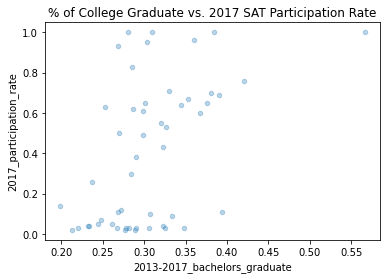

In [280]:
sat_vs_highered.plot.scatter(x='2013-2017_bachelors_graduate', y='2017_participation_rate', alpha=0.3)
plt.title('% of College Graduate vs. 2017 SAT Participation Rate');

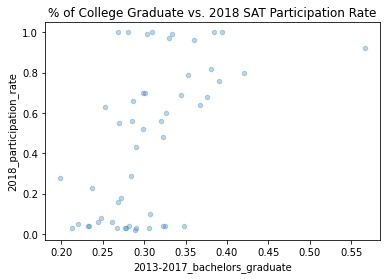

In [281]:
sat_vs_highered.plot.scatter(x='2013-2017_bachelors_graduate', y='2018_participation_rate', alpha=0.3)
plt.title('% of College Graduate vs. 2018 SAT Participation Rate');

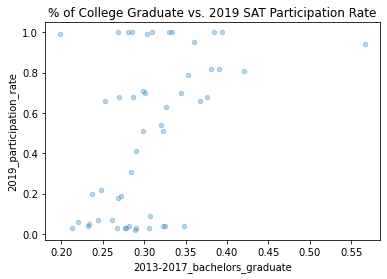

In [282]:
sat_vs_highered.plot.scatter(x='2013-2017_bachelors_graduate', y='2019_participation_rate', alpha=0.3)
plt.title('% of College Graduate vs. 2019 SAT Participation Rate');

There is a weak correlation between the percent of college graduates and the SAT participation rate although the correlation looks slightly stronger in 2018 and 2019 than 2017.

However, when you look over the SAT participation rate graphs, you can see that most states congregate near 0% or 100%, which makes it difficult to generate a strong correlation.

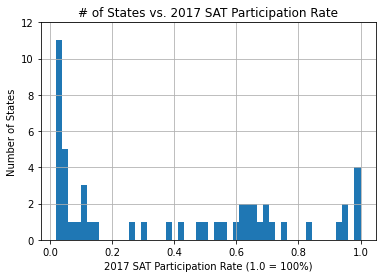

In [283]:
# Code

sat_vs_highered['2017_participation_rate'].hist(bins=50)
plt.xlabel("2017 SAT Participation Rate (1.0 = 100%)")
plt.ylabel("Number of States")
plt.ylim([0, 12]);
plt.title('# of States vs. 2017 SAT Participation Rate');

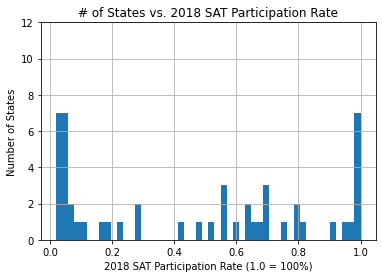

In [231]:
sat_vs_highered['2018_participation_rate'].hist(bins=50)
plt.xlabel("2018 SAT Participation Rate (1.0 = 100%)")
plt.ylabel("Number of States")
plt.ylim([0, 12]);
plt.title('# of States vs. 2018 SAT Participation Rate');

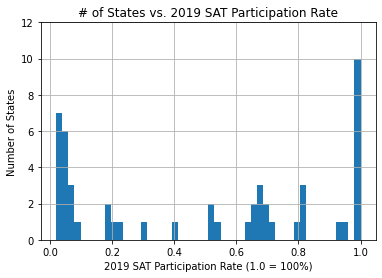

In [232]:
sat_vs_highered['2019_participation_rate'].hist(bins=50)
plt.xlabel("2019 SAT Participation Rate (1.0 = 100%)")
plt.ylabel("Number of States")
plt.ylim([0, 12]);
plt.title('# of States vs. 2019 SAT Participation Rate');

On the other hand, the % college graduate is dispersed more 'normally' although the highest percentage only hovers 50%. 

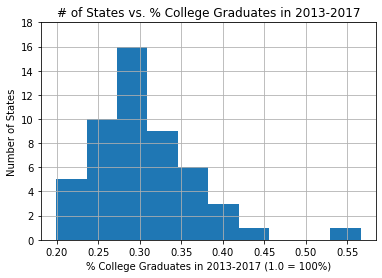

In [233]:
sat_vs_highered['2013-2017_bachelors_graduate'].hist(bins=10)
plt.xlabel("% College Graduates in 2013-2017 (1.0 = 100%)")
plt.ylabel("Number of States")
plt.ylim([0, 18]);
plt.title('# of States vs. % College Graduates in 2013-2017');

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

- Weak correlation observed; however, correlation != causation 
- Dataset is limited – more states started adopting SAT as standardized assessment test after its format change in 2016 
- Return per $ investment had not been optimized
- If more colleges abandon SAT, the incentive for students diminishes 


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!